In [10]:
%matplotlib inline

In [9]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import statistics
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

## Load Dataset
From Pickle file

In [11]:
listings_df = pd.read_pickle("listings.pkl")
X = pd.read_pickle("X.pkl")
y = pd.read_pickle("y.pkl")
X_test = pd.read_pickle("X_test.pkl")
X_train = pd.read_pickle("X_train.pkl")
y_test = pd.read_pickle("y_test.pkl")
y_train = pd.read_pickle("y_train.pkl")

In [10]:
listings_df.head()

,vin_ss,vehicle_type_ss,body_type_ss,make_ss,model_ss,year_is,fuel_type_ss,engine_size_ss,transmission_ss,doors_is,...,interior_color_ss_encoded,exterior_color_ss_encoded,state_ss_encoded,county_encoded,fips_code_encoded,msa_type_encoded,msa_name_encoded,zscore,outlier,cbsa_encoded
231130,JHLRD78883C045742,SUV,SUV,HONDA,CR-V,2003,Regular Unleaded,2.4,Automatic,4,...,384,324,28,689,1121,0,298,1.636318,False,281
66452,JHLRE48777C090454,SUV,SUV,HONDA,CR-V,2007,Regular Unleaded,2.4,Automatic,4,...,0,0,21,125,938,0,62,0.023863,False,67
144754,1HGEM225X1L115205,Car,Coupe,HONDA,CIVIC,2001,Regular Unleaded,1.7,Automatic,2,...,863,797,6,102,168,0,308,1.441992,False,292
232386,2HGFG1B88BH518131,Car,Coupe,HONDA,CIVIC,2011,Regular Unleaded,1.8,Automatic,2,...,513,1357,34,932,1434,0,19,1.051389,False,27
172683,2HGFA1F32AH537028,Car,Sedan,HONDA,CIVIC,2010,Regular Unleaded,1.8,Automatic,4,...,0,1283,33,183,1287,0,180,0.961180,False,184


# Analysis

### Discover Outliers

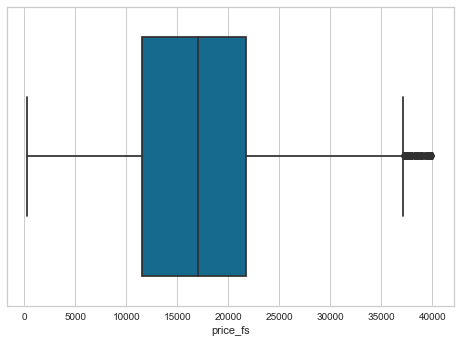

In [5]:
# Discover outliers with box plot. This analyzes uni-variate outlier, i.e. price only, to check outliers. Shows a number of points as outliers.

df=listings_df

sns.boxplot(x=listings_df['price_fs'])

### Histogram and Density plot with Mean

C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


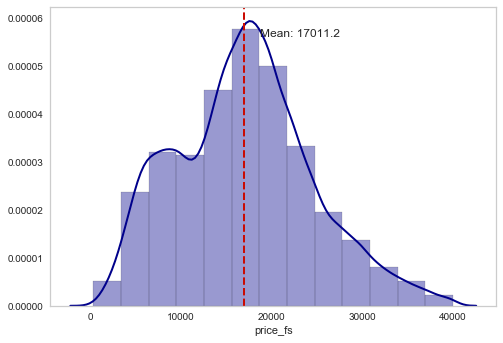

In [39]:
# Density Plot and Histogram of all prices
sns.distplot(listings_df['price_fs'], hist=True, kde=True, 
             bins=int(39789/3000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

x = listings_df['price_fs']

plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=2) 

_, max_ = plt.ylim()
plt.text(x.mean() + x.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.1f}'.format(x.mean()))

ax = plt.gca()
#plt.gca().legend(('mean','distribution'))
ax.grid(False)

### Calculate Measures of Central Tendency

In [5]:
listings_df = pd.read_pickle("listings.pkl")
X = pd.read_pickle("X.pkl")
y = pd.read_pickle("y.pkl")
X_test = pd.read_pickle("X_test.pkl")
X_train = pd.read_pickle("X_train.pkl")
y_test = pd.read_pickle("y_test.pkl")
y_train = pd.read_pickle("y_train.pkl")

price_df = listings_df[['price_fs']]

# Mean
print("mean = ", statistics.mean(price_df['price_fs']))

# Harmonic Mean
print("Harmonic mean = ", statistics.harmonic_mean(price_df['price_fs']))

# Median
print("median = ",statistics.median(price_df['price_fs']))

# Mode
print("mode = ",statistics.mode(price_df['price_fs']))

mean =  17011.174826576847
Harmonic mean =  12329.210103678584
median =  16995
mode =  6995


### Skewness and Kurtosis with Distribution plot

mean :  17011.174826576847
var  :  57430011.6622595
skew :  0.2909281620404248
kurt :  -0.19087941255948193


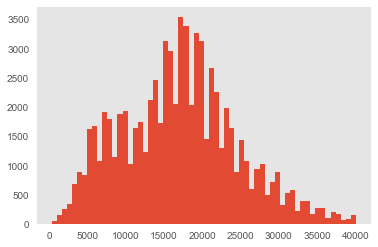

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt

plt.style.use('ggplot')

data = listings_df['price_fs']

np.var(data)

plt.hist(data, bins=60)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

ax = plt.gca()
#plt.gca().legend(('mean','distribution'))
ax.grid(False)

### Correlation Matrix

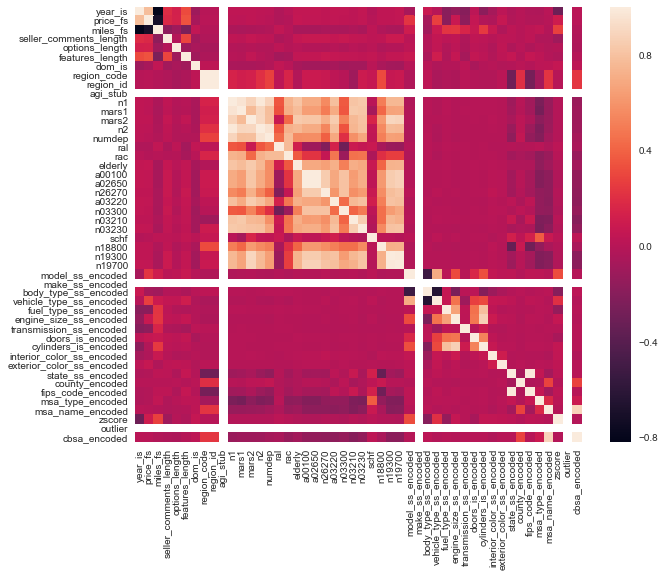

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = listings_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Correlation Coefficient on PairGrid, with r and p

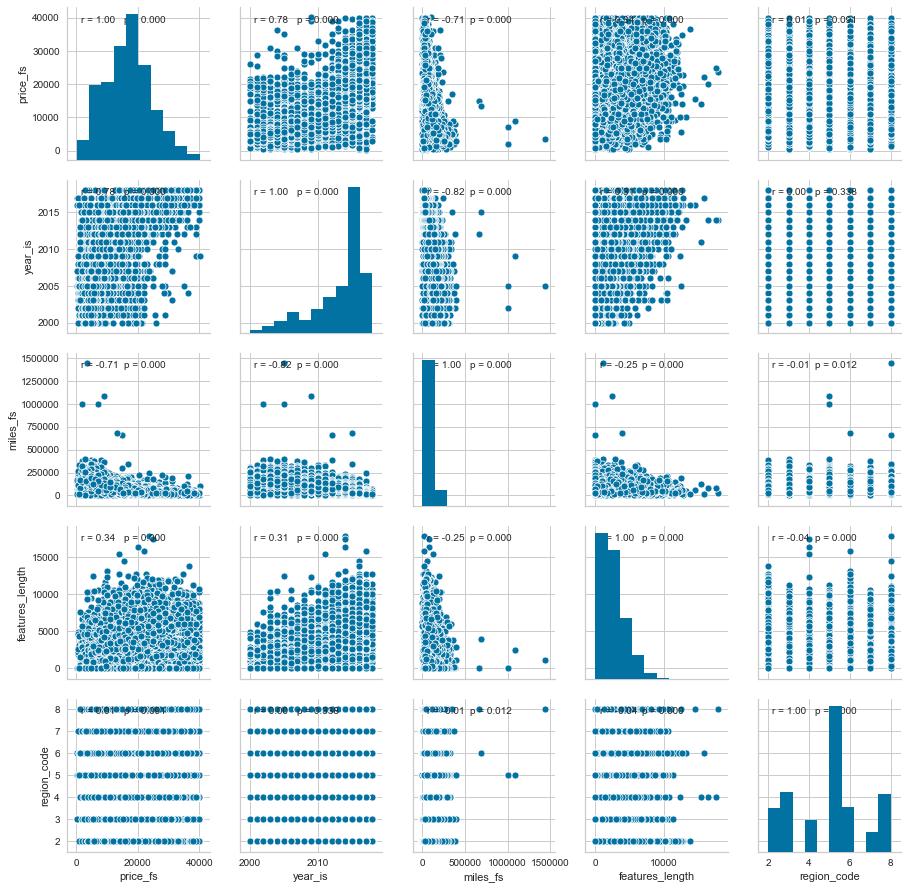

In [16]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

df = listings_df[['price_fs','year_is','miles_fs','features_length','vehicle_type_ss','region_code']]
#df = df[df["species"] == "setosa"]
#df = listings_df[['price_fs','year_is']]
graph = sns.pairplot(df)
graph.map(corrfunc)
plt.show()